In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [18]:
def graph_survival(vars_ , color_dead , color_lived):
    import numpy
    n=len(vars_)
    if n%2==0:
        rows=int(n/2)
    else:
        rows=int(n//2+1)
    fig, axs = plt.subplots(rows,2)
    ass=[axs[row,i] for i in range(2) for row in range(rows)]
    i=0
    for var in vars_:
        ax=None
        ax=ass[i]
        i=i+1
        co=[color_dead,color_lived]
        x = df[pd.notnull(df[var])]
        a=x[var].unique()
        a=np.sort(a)
        
        if (type(a[0])==numpy.float64) or len(a)/len(x)>0.5:
            print(" Your variable,var,' is continuous data  Please enter Enter the ratios for ranges as[0,20,40,60,80]")
            bins=[int(x) for x in input('').split()]
            a =pd.cut(x[var],bins)
            alpha=x.groupby(a).count()-x.groupby(a).sum()
            beta=x.groupby(a).sum()
            a=[(bins[i],bins[i+1]) for i in range(0,len(bins)-1)]
            b=np.array(beta['Survived'])
            c=np.array(alpha['Survived'])
            #index = np.arange(len(alpha))
        else:
            x = np.array(range(len(a)))+1
            b = []
            c = []
            for values in a:
                b.append(df[df[var]==values]['Survived'].sum())
                c.append(len(df.iloc[np.where(df[var]==values)].Survived)-df[df[var]==values]['Survived'].sum())
            b=np.array(b)
            c=np.array(c)
            
        index = np.arange(len(a))
        width = .35
        #print(type(b),b)
        #print('a is',a)
        rects1 = ax.bar(index, b , width, color=co[0])
        rects2 = ax.bar(index + width, c , width, color=co[1])
        
        ax.set_ylabel('Survival Count')
        ax.set_title('Survival Count vs '+ var)
        ax.set_xticks(index + width / 2)
        ax.set_xticklabels((a))
        ax.legend((rects1[0], rects2[0]), ('survied','not survived'))
        
        m=max(np.array(b).max(),np.array(c).max())+100
        ax.set_yticks(np.arange(0, m,int(m//10) ))
        plt.rcParams["figure.figsize"] = (20,25)
        ax.grid()
        
        r=[]
        r.append(rects1)
        r.append(rects2)
        
        for rs in r:
            for rect in rs:
                height = rect.get_height()
                ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                    '%d' % int(height),
                        ha='center', va='bottom',fontweight='bold',fontsize=10)
    
    
    return fig


In [4]:
def graph_gender(vars_ , color_dead , color_lived):
    import numpy
    n=len(vars_)
    if n%2==0:
        rows=int(n/2)
    else:
        rows=int(n//2+1)
    fig, axs = plt.subplots(rows,2)
    ass=[axs[row,i] for i in range(2) for row in range(rows)]
    i=0
    for var in vars_:
        ax=None
        ax=ass[i]
        i=i+1
        co=[color_dead,color_lived]
        x = df[pd.notnull(df[var])]
        a=x[var].unique()
        a=np.sort(a)
        
        if (type(a[0])==numpy.float64) or len(a)/len(x)>0.5:
            print(" Your variable",var," is continuous data  Please enter Enter the ratios for ranges as[0,20,40,60,80]")
            bins=[int(x) for x in input('').split()]
            a =pd.cut(x[var],bins)
            alpha=x.groupby(a).count()-x.groupby(a).sum()
            beta=x.groupby(a).sum()
            a=[(bins[i],bins[i+1]) for i in range(0,len(bins)-1)]
            b=np.array(beta['Sex'])
            c=np.array(alpha['Sex'])
            #index = np.arange(len(alpha))
        else:
            x = np.array(range(len(a)))+1
            b = []
            c = []
            for values in a:
                b.append(len(df[(df[var]==values) & (df['Sex']=='male')]))
                c.append(len(df[(df[var]==values) & (df['Sex']=='female')]))
            b=np.array(b)
            c=np.array(c)
            
        index = np.arange(len(a))
        width = .35
        #print(type(b),b)
        #print('a is',a)
        rects1 = ax.bar(index, b , width, color=co[0])
        rects2 = ax.bar(index + width, c , width, color=co[1])
        
        ax.set_ylabel('Sex')
        ax.set_title('Sex vs '+ var)
        ax.set_xticks(index + width / 2)
        ax.set_xticklabels((a))
        ax.legend((rects1[0], rects2[0]), ('Male','Female'))
        
        m=max(np.array(b).max(),np.array(c).max())+100
        ax.set_yticks(np.arange(0, m,int(m//10) ))
        plt.rcParams["figure.figsize"] = (20,25)
        ax.grid()
        
        r=[]
        r.append(rects1)
        r.append(rects2)
        
        for rs in r:
            for rect in rs:
                height = rect.get_height()
                ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                    '%d' % int(height),
                        ha='center', va='bottom',fontweight='bold',fontsize=10)
    
    
    return fig


In [5]:
def graph_pclass(vars_ , color_1,color_2,color_3):
    import numpy
    n=len(vars_)
    if n%2==0:
        rows=int(n/2)
    else:
        rows=int(n//2+1)
    fig, axs = plt.subplots(rows,2)
    ass=[axs[row,i] for i in range(2) for row in range(rows)]
    i=0
    for var in vars_:
        ax=None
        ax=ass[i]
        i=i+1
        co=[color_1,color_2,color_3]
        x = df[pd.notnull(df[var])]
        a=x[var].unique()
        a=np.sort(a)
        
        if (type(a[0])==numpy.float64) or len(a)/len(x)>0.5:
            print(" Your variable',var,' is continuous data  Please enter Enter the ratios for ranges as[0,20,40,60,80]")
            bins=[int(x) for x in input('').split()]
            a =pd.cut(x[var],bins)
            alpha=x.groupby(a).count()-x.groupby(a).sum()
            beta=x.groupby(a).sum()
            a=[(bins[i],bins[i+1]) for i in range(0,len(bins)-1)]
            b=np.array(beta['Sex'])
            c=np.array(alpha['Sex'])
            #index = np.arange(len(alpha))
        else:
            x = np.array(range(len(a)))+1
            b = []
            c = []
            d = []
            for values in a:
                b.append(len(df[(df[var]==values) & (df['Pclass']==1)]))
                c.append(len(df[(df[var]==values) & (df['Pclass']==2)]))
                d.append(len(df[(df[var]==values) & (df['Pclass']==3)]))
            b=np.array(b)
            c=np.array(c)
            d=np.array(d)
        index = np.arange(len(a))
        width = .2
        #print(type(b),b)
        #print('a is',a)
        rects1 = ax.bar(index, b , width, color=co[0] , edgecolor= 'black')
        rects2 = ax.bar(index + width, c , width, color=co[1])
        rects3 = ax.bar(index + 2*width, d , width, color=co[2])
        
        ax.set_ylabel('Pclass')
        ax.set_title('Pclass vs '+ var)
        ax.set_xticks(index + width )
        ax.set_xticklabels((a))
        ax.legend((rects1[0], rects2[0] , rects3[0]), ('1','2','3'))
        
        m=max(np.array(b).max(),np.array(c).max(),np.array(d).max())+100
        ax.set_yticks(np.arange(0, m,int(m//10) ))
        plt.rcParams["figure.figsize"] = (20,25)
        ax.grid()
        
        r=[]
        r.append(rects1)
        r.append(rects2)
        r.append(rects3)
        for rs in r:
            for rect in rs:
                height = rect.get_height()
                ax.text(rect.get_x() + rect.get_width()/3., 1.0*height,
                    '%d' % int(height),
                        ha='center', va='bottom',fontweight='bold',fontsize=10)
    
    
    return fig


In [6]:
def graph_embarked(vars_ , color_1,color_2,color_3):
    import numpy
    n=len(vars_)
    if n%2==0:
        rows=int(n/2)
    else:
        rows=int(n//2+1)
    fig, axs = plt.subplots(rows,2)
    ass=[axs[row,i] for i in range(2) for row in range(rows)]
    i=0
    for var in vars_:
        ax=None
        ax=ass[i]
        i=i+1
        co=[color_1,color_2,color_3]
        x = df[pd.notnull(df[var])]
        a=x[var].unique()
        a=np.sort(a)
        
        if (type(a[0])==numpy.float64) or len(a)/len(x)>0.5:
            print(" Your variable',var,' is continuous data  Please enter Enter the ratios for ranges as[0,20,40,60,80]")
            bins=[int(x) for x in input('').split()]
            a =pd.cut(x[var],bins)
            alpha=x.groupby(a).count()-x.groupby(a).sum()
            beta=x.groupby(a).sum()
            a=[(bins[i],bins[i+1]) for i in range(0,len(bins)-1)]
            b=np.array(beta['Sex'])
            c=np.array(alpha['Sex'])
            #index = np.arange(len(alpha))
        else:
            x = np.array(range(len(a)))+1
            b = []
            c = []
            d = []
            for values in a:
                b.append(len(df[(df[var]==values) & (df['Embarked']=='C')]))
                c.append(len(df[(df[var]==values) & (df['Embarked']=='Q')]))
                d.append(len(df[(df[var]==values) & (df['Embarked']=='S')]))
            b=np.array(b)
            c=np.array(c)
            d=np.array(d)
        index = np.arange(len(a))
        width = .2
        #print(type(b),b)
        #print('a is',a)
        rects1 = ax.bar(index, b , width, color=co[0] , edgecolor= 'black')
        rects2 = ax.bar(index + width, c , width, color=co[1])
        rects3 = ax.bar(index + 2*width, d , width, color=co[2])
        
        ax.set_ylabel('Embarked')
        ax.set_title('Embarked vs '+ var)
        ax.set_xticks(index + width )
        ax.set_xticklabels((a))
        ax.legend((rects1[0], rects2[0] , rects3[0]), ('1','2','3'))
        
        m=max(np.array(b).max(),np.array(c).max(),np.array(d).max())+100
        ax.set_yticks(np.arange(0, m,int(m//10) ))
        plt.rcParams["figure.figsize"] = (20,25)
        ax.grid()
        
        r=[]
        r.append(rects1)
        r.append(rects2)
        r.append(rects3)
        for rs in r:
            for rect in rs:
                height = rect.get_height()
                ax.text(rect.get_x() + rect.get_width()/3., 1.0*height,
                    '%d' % int(height),
                        ha='center', va='bottom',fontweight='bold',fontsize=10)
    
    
    return fig


In [7]:
def graph_fare(vars_ , color_1,color_2,color_3,color_4):
    import numpy
    n=len(vars_)
    if n%2==0:
        rows=int(n/2)
    else:
        rows=int(n//2+1)
    fig, axs = plt.subplots(rows,2)
    ass=[axs[row,i] for i in range(2) for row in range(rows)]
    i=0
    for var in vars_:
        ax=None
        ax=ass[i]
        i=i+1
        co=[color_1,color_2,color_3,color_4]
        x = df[pd.notnull(df[var])]
        a=x[var].unique()
        a=np.sort(a)
        
        if (type(a[0])==numpy.float64) or len(a)/len(x)>0.5:
            print(" Your variable",var," is continuous data  Please enter Enter the ratios for ranges as[0,20,40,60,80]")
            bins=[int(x) for x in input('').split()]
            a =pd.cut(x[var],bins)
            alpha=x.groupby(a).count()-x.groupby(a).sum()
            beta=x.groupby(a).sum()
            a=[(bins[i],bins[i+1]) for i in range(0,len(bins)-1)]
            b=np.array(beta['Sex'])
            c=np.array(alpha['Sex'])
            #index = np.arange(len(alpha))
        else:
            x = np.array(range(len(a)))+1
            b = []
            c = []
            d = []
            e = []
            for values in a:
                b.append(len(df[(df[var]==values) & (df['Fare']>0) & (df['Fare']<8)]))
                c.append(len(df[(df[var]==values) & (df['Fare']>=8) & (df['Fare']<15)]))
                d.append(len(df[(df[var]==values) & (df['Fare']>=15) & (df['Fare']<32)]))
                e.append(len(df[(df[var]==values) & (df['Fare']>=32) & (df['Fare']<512)]))
            b=np.array(b)
            c=np.array(c)
            d=np.array(d)
            e=np.array(e)
        index = np.arange(len(a))
        width = .15
        #print(type(b),b)
        #print('a is',a)
        rects1 = ax.bar(index, b , width, color=co[0])
        rects2 = ax.bar(index + width, c , width, color=co[1])
        rects3 = ax.bar(index + 2*width, d , width, color=co[2])
        rects4 = ax.bar(index + 3*width, e , width, color=co[3])
        ax.set_ylabel('Fare')
        ax.set_title('Fare vs '+ var)
        ax.set_xticks(index + width*1.5)
        ax.set_xticklabels((a))
        ax.legend((rects1[0], rects2[0] , rects3[0] , rects4[0]), ('0-8','8-15','15-32','32-512'))
        
        m=max(np.array(b).max(),np.array(c).max(),np.array(d).max(),np.array(e).max())+100
        ax.set_yticks(np.arange(0, m,int(m//10) ))
        plt.rcParams["figure.figsize"] = (20,25)
        ax.grid()
        
        r=[]
        r.append(rects1)
        r.append(rects2)
        r.append(rects3)
        r.append(rects4)
        
        for rs in r:
            for rect in rs:
                height = rect.get_height()
                ax.text(rect.get_x() + rect.get_width()/4., 1.0*height,
                    '%d' % int(height),
                        ha='center', va='bottom',fontweight='bold',fontsize=8)
    
    
    return fig


In [8]:
def graph_age(vars_ , color_1,color_2,color_3,color_4):
    import numpy
    n=len(vars_)
    if n%2==0:
        rows=int(n/2)
    else:
        rows=int(n//2+1)
    fig, axs = plt.subplots(rows,2)
    ass=[axs[row,i] for i in range(2) for row in range(rows)]
    i=0
    for var in vars_:
        ax=None
        ax=ass[i]
        i=i+1
        co=[color_1,color_2,color_3,color_4]
        x = df[pd.notnull(df[var])]
        a=x[var].unique()
        a=np.sort(a)
        
        if (type(a[0])==numpy.float64) or len(a)/len(x)>0.5:
            print(" Your variable",var," is continuous data  Please enter Enter the ratios for ranges as[0,20,40,60,80]")
            bins=[int(x) for x in input('').split()]
            a =pd.cut(x[var],bins)
            alpha=x.groupby(a).count()-x.groupby(a).sum()
            beta=x.groupby(a).sum()
            a=[(bins[i],bins[i+1]) for i in range(0,len(bins)-1)]
            b=np.array(beta['Sex'])
            c=np.array(alpha['Sex'])
            #index = np.arange(len(alpha))
        else:
            x = np.array(range(len(a)))+1
            b = []
            c = []
            d = []
            e = []
            for values in a:
                b.append(len(df[(df[var]==values) & (df['Age']>0) & (df['Age']<6)]))
                c.append(len(df[(df[var]==values) & (df['Age']>=6) & (df['Age']<20)]))
                d.append(len(df[(df[var]==values) & (df['Age']>=20) & (df['Age']<40)]))
                e.append(len(df[(df[var]==values) & (df['Age']>=40) & (df['Age']<100)]))
            b=np.array(b)
            c=np.array(c)
            d=np.array(d)
            e=np.array(e)
        index = np.arange(len(a))
        width = .15
        #print(type(b),b)
        #print('a is',a)
        rects1 = ax.bar(index, b , width, color=co[0])
        rects2 = ax.bar(index + width, c , width, color=co[1])
        rects3 = ax.bar(index + 2*width, d , width, color=co[2])
        rects4 = ax.bar(index + 3*width, e , width, color=co[3])
        ax.set_ylabel('Age')
        ax.set_title('Age vs '+ var)
        ax.set_xticks(index + width*1.5)
        ax.set_xticklabels((a))
        ax.legend((rects1[0], rects2[0] , rects3[0] , rects4[0]), ('0-6','6-20','20-40','40-80'))
        
        m=max(np.array(b).max(),np.array(c).max(),np.array(d).max(),np.array(e).max())+100
        ax.set_yticks(np.arange(0, m,int(m//10) ))
        plt.rcParams["figure.figsize"] = (20,25)
        ax.grid()
        
        r=[]
        r.append(rects1)
        r.append(rects2)
        r.append(rects3)
        r.append(rects4)
        
        for rs in r:
            for rect in rs:
                height = rect.get_height()
                ax.text(rect.get_x() + rect.get_width()/4., 1.0*height,
                    '%d' % int(height),
                        ha='center', va='bottom',fontweight='bold',fontsize=10)
    
    
    return fig


In [9]:
df['Cabin-No.']=[str(x)[0] for x in df['Cabin'] ]
df.head()  ## this is new df after the modification mentioned above

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin-No.
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,n


In [10]:
import re
df['tick']=None
for i in range(len(df)):
    strin=df['Ticket'][i]
    a=strin.split(' ')
    try:
        temp=int(a[0])
        length =len(a[0])
        df['tick'][i]=new.lower()
    except:
        new=re.sub('[^a-zA-Z0-9 \n]', '', a[0])
        df['tick'][i]=new.lower()
df['ticket']=None
new=None
for k in range(len(df)):
    ele=df['tick'][k]
    try:
        new=ele[0]+''
        df['ticket'][k]=new
    except:
        df['ticket'][k]=new  

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
#survival vs all
cols=['Sex','Pclass','Embarked','Parch','SibSp','Cabin-No.','Age','Fare']
ff=graph_survival(cols, 'blue' , 'red')

 Your variable,var,' is continuous data  Please enter Enter the ratios for ranges as[0,20,40,60,80]
0 6 20 40 80
 Your variable,var,' is continuous data  Please enter Enter the ratios for ranges as[0,20,40,60,80]
0 8 15 32 512


<h1><b>Cabin number 'n' in all the below graphs represents 'Nan'</b></h1> 

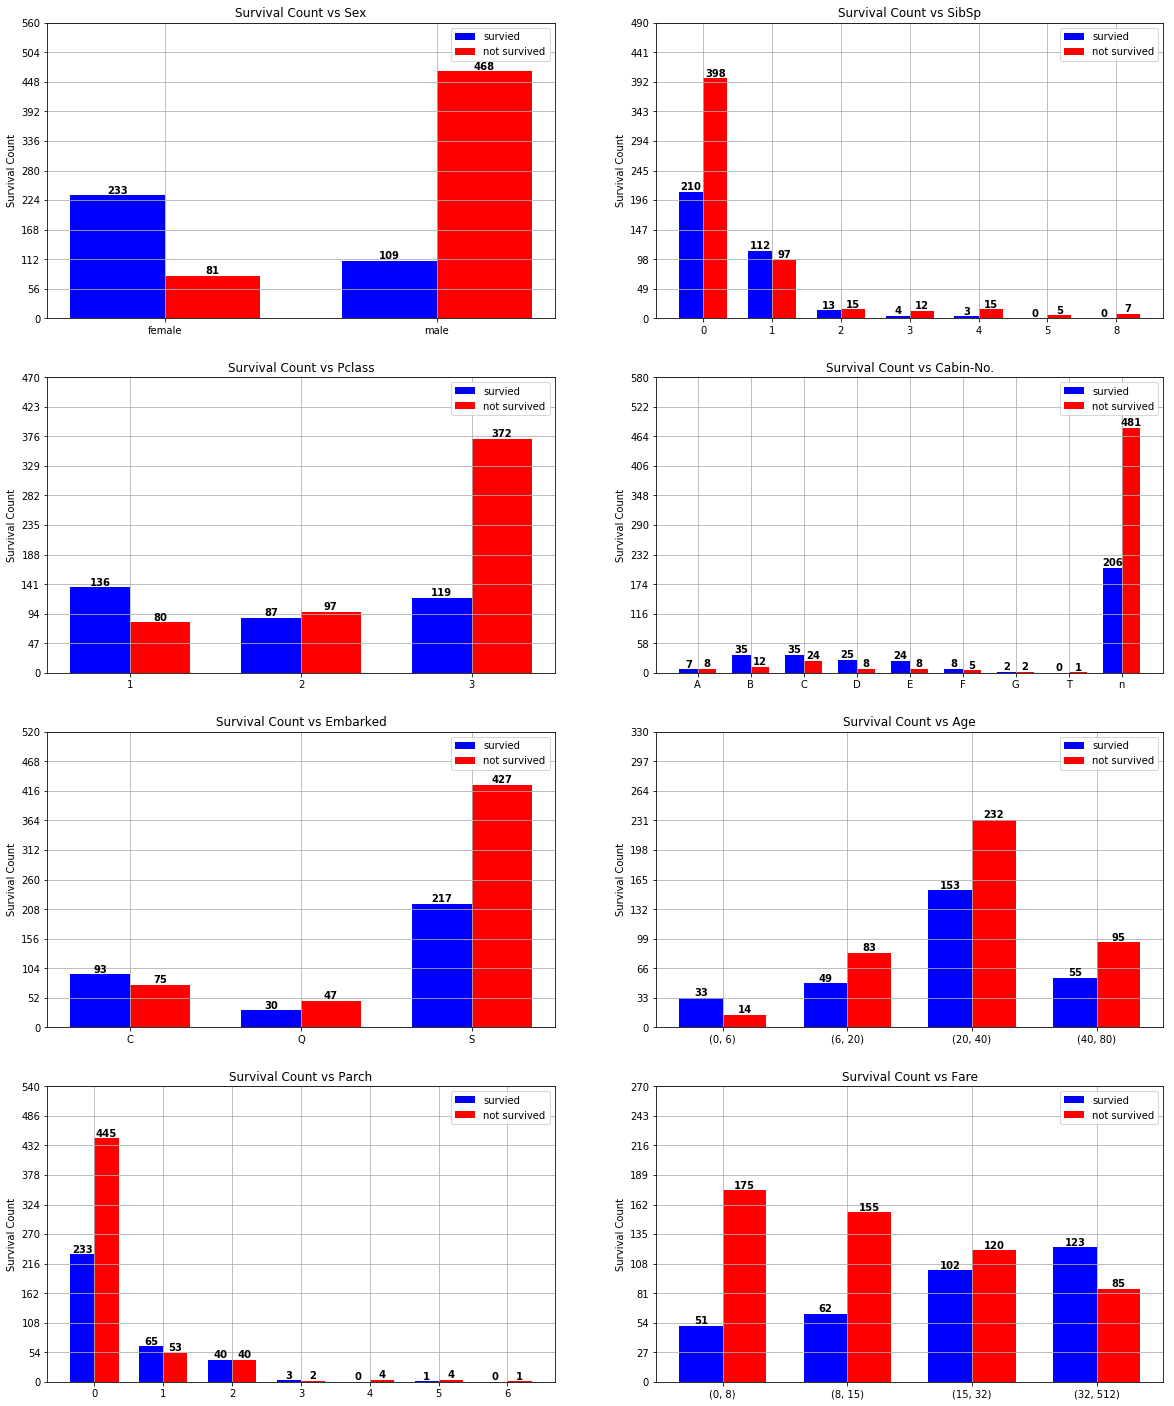

In [21]:
plt.show(ff)

## Summary About the graphs of Survival vs other Features

Survival vs Fare:: In this graph survival chance for a low fare(< 15) is lower than that of higher fare(>15)

Survival vs Parch:: Parch 0 have lower chance of survival all others are similar

Survival vs age:: Persons with lower age(< 6) have higher chance of survival

Survival vs Embarked:: Person with embarked S have lower chance of survival 

Survival vs Cabin no :: Cabins except 'n' means nan have almost equal chance of survival with (B, E ,C,D) having 
                        higher rate of survival.
                        Where as 'n' people have significantly lower rate survival

Survival vs Pclass:: class 3 people have lower chance of surival

Survival vs SibSp:: for SibSp low (0) survival rate is low , for intermediate (1,2) is equal as not survived .
                    But again for higher SibSp survival rate is lower

Survival Count vs Sex:: Again for male , survival rate is significantly lower than that of female


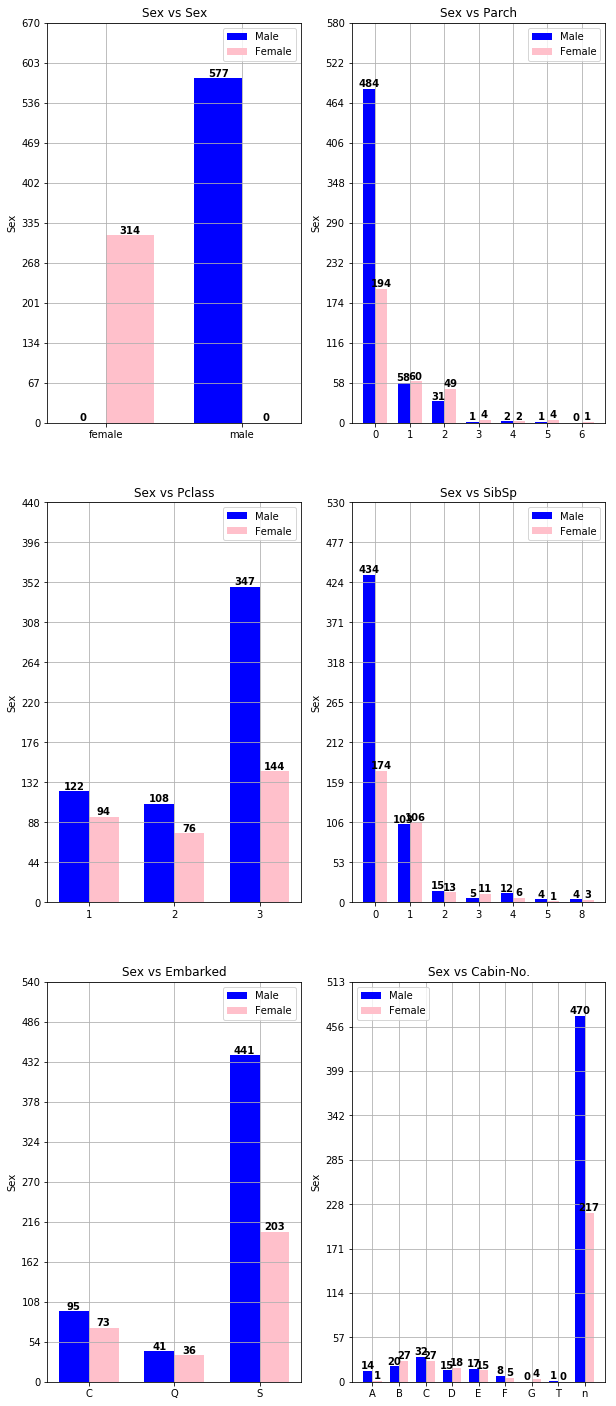

In [13]:
#Gender vs all
cols=['Sex','Pclass','Embarked','Parch','SibSp','Cabin-No.']
my_vars0=graph_gender(cols, 'blue' , 'pink')
plt.show(my_vars0)

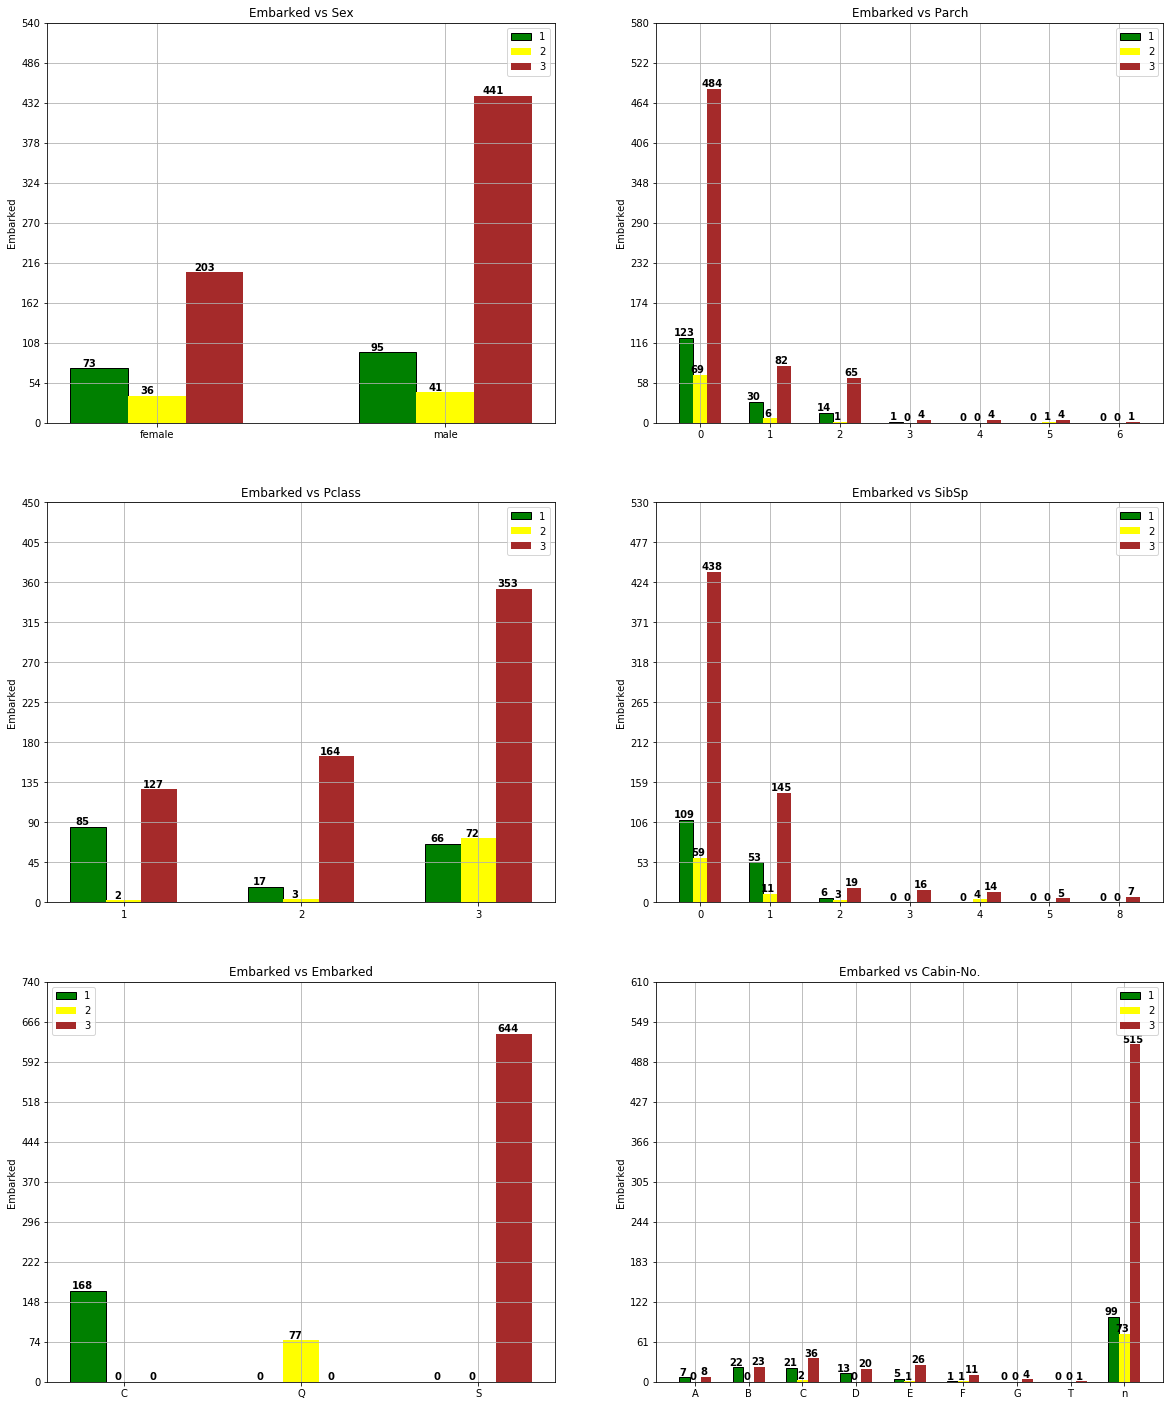

In [14]:
#Embarked vs all
cols=['Sex','Pclass','Embarked','Parch','SibSp','Cabin-No.']
my_vars1=graph_embarked(cols, 'green' , 'yellow','brown')
plt.show(my_vars1)

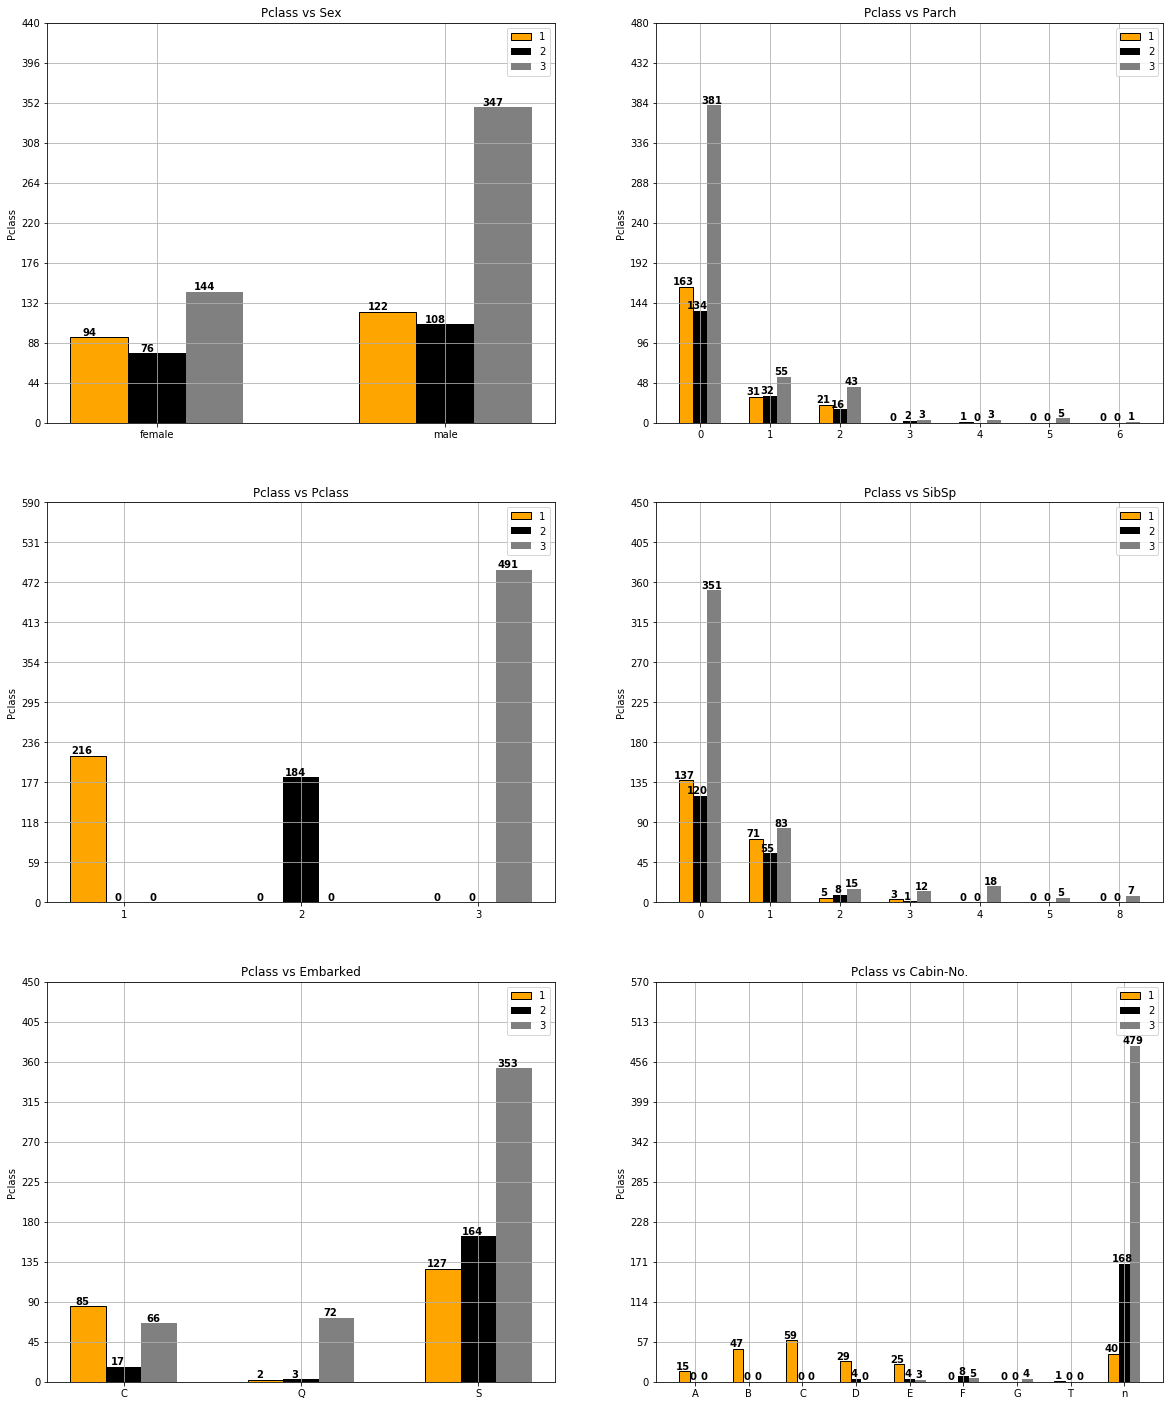

In [15]:
#Pclass vs all
cols=['Sex','Pclass','Embarked','Parch','SibSp','Cabin-No.']
my_vars2=graph_pclass(cols, 'orange' , 'black','grey')
plt.show(my_vars2)

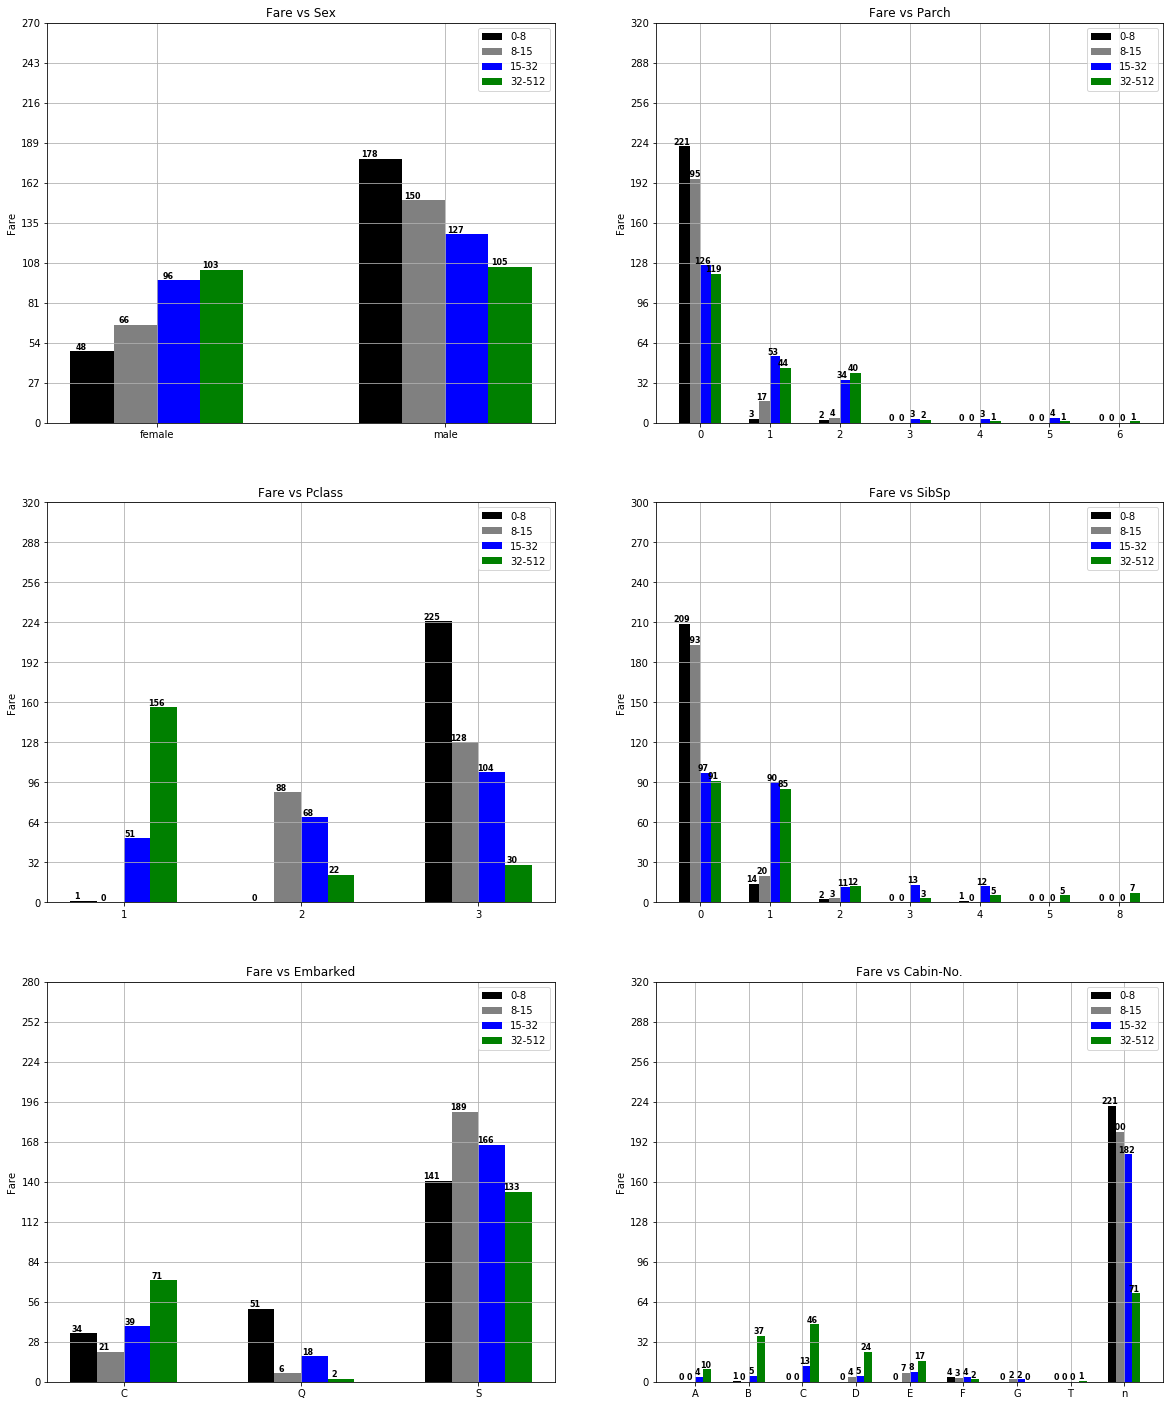

In [16]:
#Fare vs all
cols=['Sex','Pclass','Embarked','Parch','SibSp','Cabin-No.']
my_vars3=graph_fare(cols, 'black','grey','blue','green')
plt.show(my_vars3)

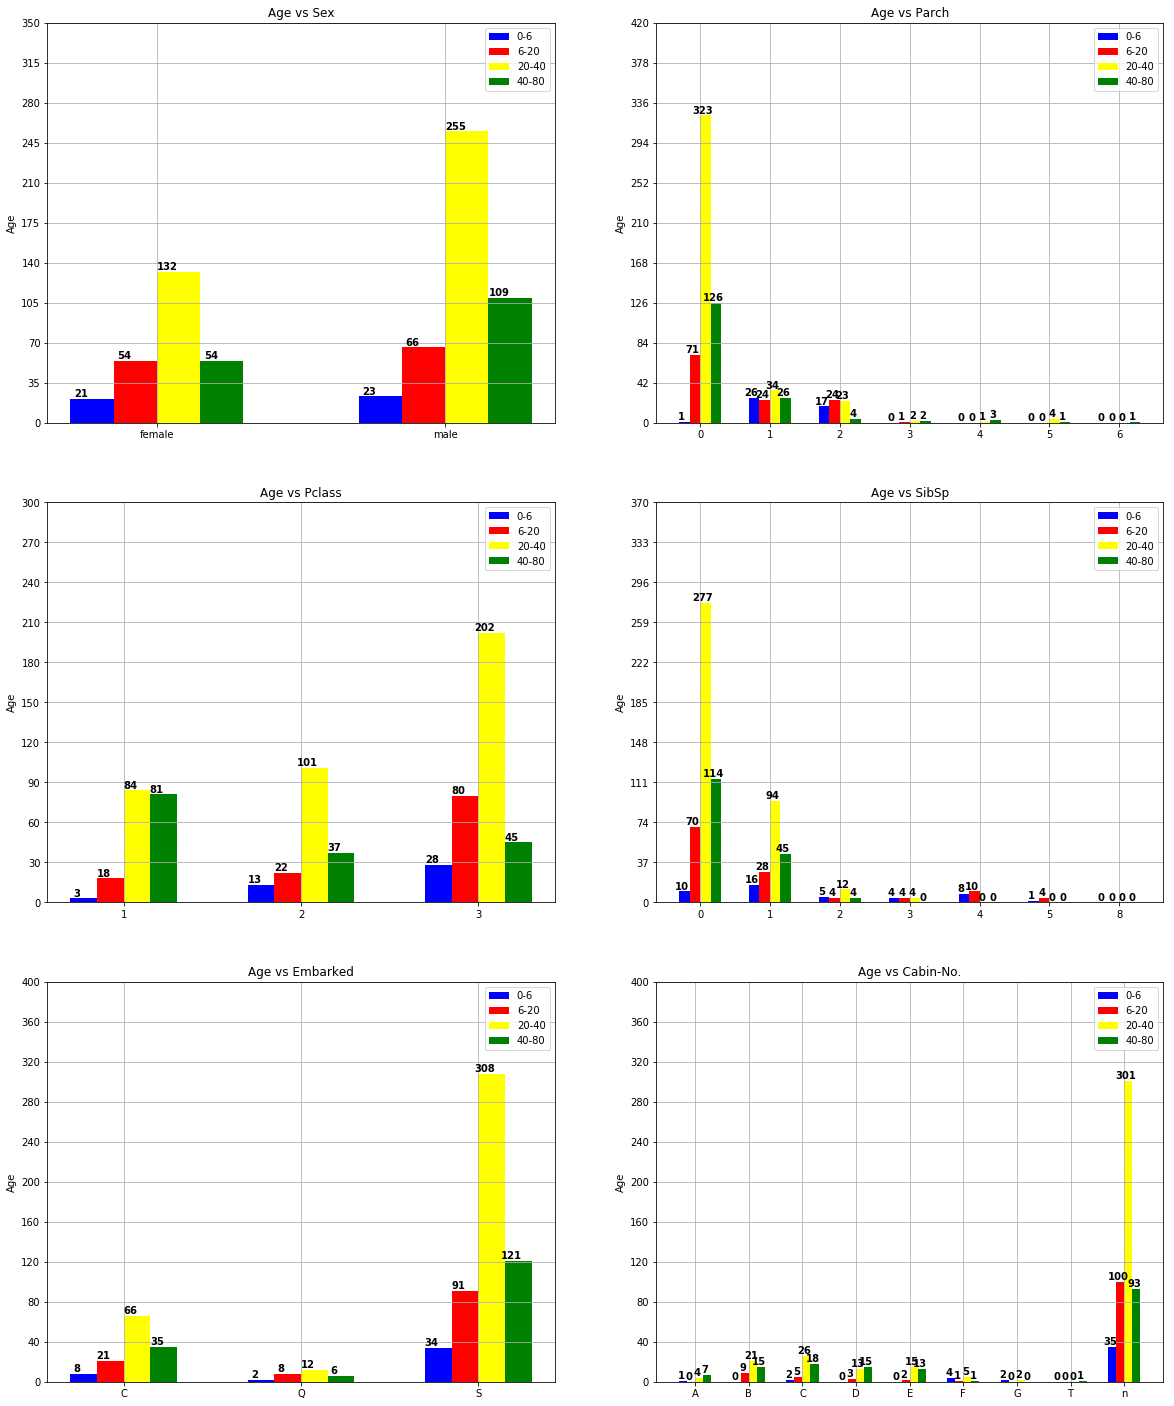

In [17]:
#Age vs all
cols=['Sex','Pclass','Embarked','Parch','SibSp','Cabin-No.']
my_vars4=graph_age(cols, 'blue','red','yellow','green')
plt.show(my_vars4)